In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pylab as plt
import folium
from folium3Dhack import Map3d, TileLayer3d
from folium import plugins
from shapely.geometry import Point

# Read the dataset

In [2]:
df = pd.read_parquet('data/geolife_trajectories_1_3.parquet')
print(df.shape[0])
df.head()

24876978


,lat,lon,datetime,altitude_meters,tripId,userId
0,39.947122,116.318730,2009-02-14 03:28:49,149.9616,023_20090214032849,023
1,39.947121,116.318705,2009-02-14 03:28:54,149.6568,023_20090214032849,023
2,39.947100,116.319021,2009-02-14 03:28:59,186.8424,023_20090214032849,023
3,39.947140,116.318876,2009-02-14 03:29:04,177.6984,023_20090214032849,023
4,39.947177,116.318921,2009-02-14 03:29:09,166.4208,023_20090214032849,023


In [3]:
df.tripId.nunique()

18670

In [4]:
df.userId.nunique()

182

In [5]:
df.dtypes

lat                       float64
lon                       float64
datetime           datetime64[ns]
altitude_meters           float64
tripId                     object
userId                     object
dtype: object

In [6]:
df.describe()

,lat,lon,altitude_meters
count,2.487698e+07,2.487698e+07,2.487698e+07
mean,3.897989e+01,1.123597e+02,1.563677e+02
std,4.070501e+00,2.717960e+01,7.016422e+02
min,1.044024e+00,-1.799696e+02,-9.950988e+03
25%,3.990636e+01,1.163065e+02,2.398776e+01
50%,3.997498e+01,1.163342e+02,4.498848e+01
75%,3.999848e+01,1.164194e+02,6.675120e+01
max,4.001667e+02,1.799969e+02,3.276701e+04


In [7]:
## Make smaller datasets for inefficient plottting tools
df_small = df.head(5000)
df_small

,lat,lon,datetime,altitude_meters,tripId,userId
0,39.947122,116.318730,2009-02-14 03:28:49,149.9616,023_20090214032849,023
1,39.947121,116.318705,2009-02-14 03:28:54,149.6568,023_20090214032849,023
2,39.947100,116.319021,2009-02-14 03:28:59,186.8424,023_20090214032849,023
3,39.947140,116.318876,2009-02-14 03:29:04,177.6984,023_20090214032849,023
4,39.947177,116.318921,2009-02-14 03:29:09,166.4208,023_20090214032849,023
...,...,...,...,...,...,...
4995,22.810557,108.324795,2009-02-01 10:40:31,0.0000,023_20090201061708,023
4996,22.810553,108.324795,2009-02-01 10:40:33,0.0000,023_20090201061708,023
4997,22.810548,108.324825,2009-02-01 10:40:38,0.0000,023_20090201061708,023
4998,22.810555,108.324882,2009-02-01 10:40:43,0.0000,023_20090201061708,023


## Convert to a geopandas dataframe (takes a while)

In [8]:
gdf = gpd.GeoDataFrame(df_small, geometry=gpd.points_from_xy(x=df_small.lon, y=df_small.lat))
print(gdf.shape[0])
gdf.head()

5000


,lat,lon,datetime,altitude_meters,tripId,userId,geometry
0,39.947122,116.318730,2009-02-14 03:28:49,149.9616,023_20090214032849,023,POINT (116.31873 39.94712)
1,39.947121,116.318705,2009-02-14 03:28:54,149.6568,023_20090214032849,023,POINT (116.31871 39.94712)
2,39.947100,116.319021,2009-02-14 03:28:59,186.8424,023_20090214032849,023,POINT (116.31902 39.94710)
3,39.947140,116.318876,2009-02-14 03:29:04,177.6984,023_20090214032849,023,POINT (116.31888 39.94714)
4,39.947177,116.318921,2009-02-14 03:29:09,166.4208,023_20090214032849,023,POINT (116.31892 39.94718)


## Native GeoPandas plotting

In [9]:
print(gpd.datasets.available)
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world

['naturalearth_lowres', 'naturalearth_cities', 'nybb']


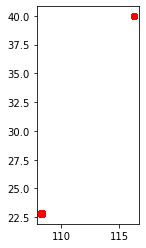

In [10]:
# Get the outline of China
#ax = world[world.name == 'China'].plot()
gdf.plot(color='red')

## matplotlib

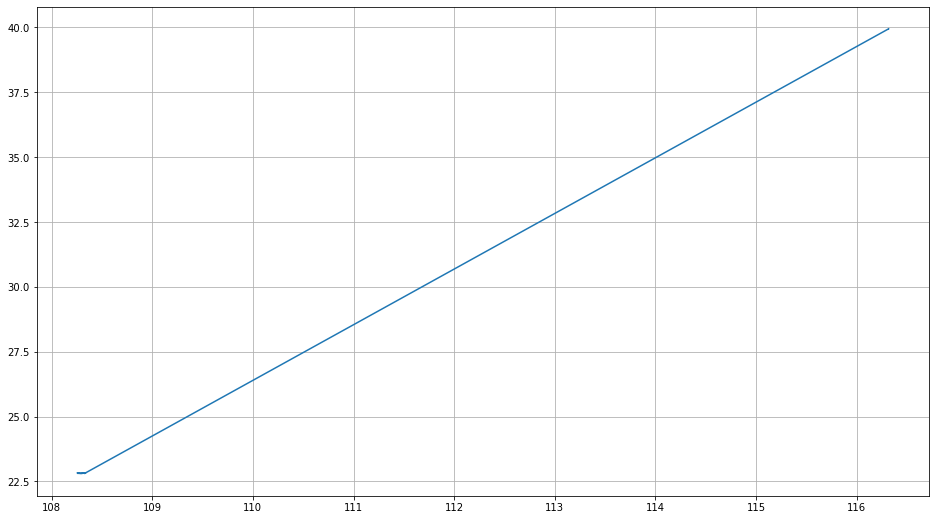

In [11]:
plt.figure(figsize = (16, 9))
plt.plot(df_small.lon, df_small.lat)
plt.grid()

## folium

In [12]:
m = folium.Map() # m = folium.Map([22.813473, 108.333078], zoom_start=15) or use m.fit_bounds(m.get_bounds())

# Select 10 trips
trips = df.tripId.unique().tolist()[2:3]

for trip in trips:
    df_plot = df[df.tripId == trip]

    # Format data as a list of tupples
    line_data = list(df_plot[['lat', 'lon']].itertuples(index=False, name=None))
    line = folium.PolyLine(line_data, weight=15).add_to(m)

m.fit_bounds(m.get_bounds())
#m.save('data/folium_simple_line.html')
m

In [13]:
m = folium.Map()

for trip in trips:
    df_plot = df[df.tripId == trip]

    # Format data as a list of tupples
    line_data = list(df_plot[['lat', 'lon']].itertuples(index=False, name=None))

    # Plot the line
    folium.plugins.AntPath(locations=line_data, reverse='True', dash_array=[20, 30]).add_to(m)

m.fit_bounds(m.get_bounds())
m

In [14]:
m = folium.Map()

heatmap = df_plot[['lat', 'lon']].as_matrix()

# plot heatmap

m.add_child(plugins.HeatMap(heatmap, radius=15))
m.fit_bounds(m.get_bounds())
m

/home/tjansson/miniconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
m = Map3d(location=[-42, -42], tiles=None, zoom_start=2)
m.add_child(TileLayer3d(tiles='OpenStreetMap'))

url = ('http://services.arcgisonline.com/arcgis/rest/services'
       'Ocean/World_Ocean_Base'
       'MapServer/tile/{z}/{y}/{x}')

folium.TileLayer(
    tiles=url,
    name='World_Ocean_Base',
    attr='ESRI',
    overlay=True
).add_to(m)

m.add_child(plugins.HeatMap(heatmap, radius=15))

#m.save('data/folium_3D_globe.html')
m